<a href="https://colab.research.google.com/github/cxbxmxcx/Practical_AI_on_GCP/blob/master/Chapter_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0-rc1


In [ ]:
dataset_path = keras.utils.get_file("housing.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
dataset_path


49152/49082 [==============================] - 0s 1us/step


'/root/.keras/datasets/housing.data'

In [ ]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [ ]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
MEDV       0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

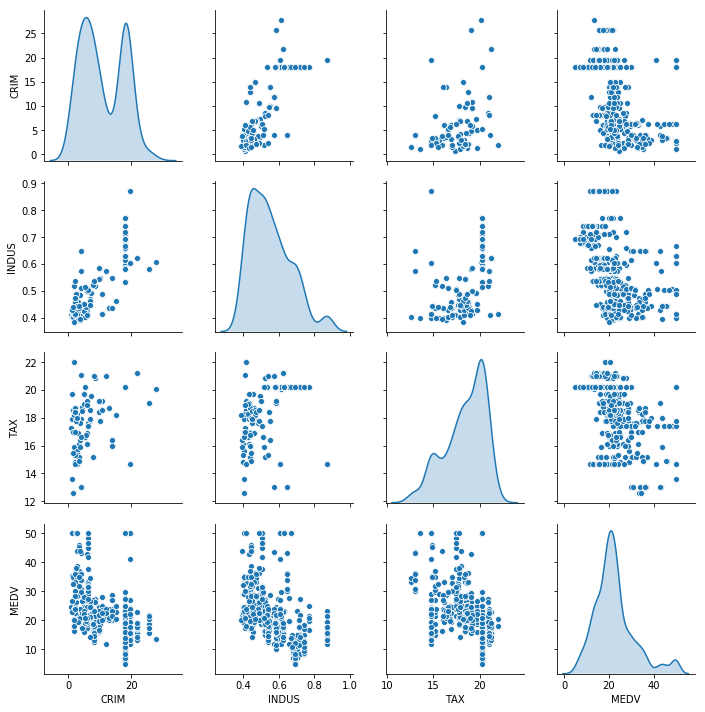

In [ ]:
sns.pairplot(train_dataset[["CRIM", "INDUS", "TAX", "MEDV"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,11.097951,6.699157,0.7400,5.3200,9.6900,18.1000,27.7400
ZN,405.0,0.069136,0.253999,0.0000,0.0000,0.0000,0.0000,1.0000
INDUS,405.0,0.553098,0.115564,0.3850,0.4490,0.5380,0.6240,0.8710
CHAS,405.0,6.269768,0.690552,3.5610,5.8780,6.1930,6.6190,8.7800
NOX,405.0,68.241975,27.908527,2.9000,45.0000,76.5000,94.1000,100.0000
RM,405.0,3.834098,2.162173,1.1296,2.0788,3.2721,5.2146,12.1265
DIS,405.0,9.474074,8.618564,1.0000,4.0000,5.0000,24.0000,24.0000
RAD,405.0,405.839506,164.057951,187.0000,284.0000,334.0000,666.0000,711.0000
TAX,405.0,18.437037,2.141275,12.6000,17.3000,18.8000,20.2000,22.0000
PTRATIO,405.0,356.276444,91.298597,2.6000,375.2100,391.2300,396.2400,396.9000


In [ ]:
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data.tail()
normed_test_data.tail()

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B
0.15086,0.0,2.484201,-0.27219,0.483734,-1.181328,0.876364,-0.931099,-0.635149,1.860077,0.776623,0.425128,0.764580
0.18337,0.0,2.484201,-0.27219,0.483734,-1.239252,1.077019,-0.961393,-0.635149,1.860077,0.776623,-0.133917,1.598115
0.20746,0.0,2.484201,-0.27219,0.483734,-1.704098,1.066270,-0.930313,-0.635149,1.860077,0.776623,-0.414535,2.403443
0.11132,0.0,2.484201,-0.27219,0.483734,-0.415274,0.546716,-0.797438,-0.635149,1.860077,0.776623,0.444953,0.100290
0.10959,0.0,0.124202,-0.27219,0.172218,0.759150,0.754537,-0.668401,-0.983235,-0.809711,1.196933,0.407165,-0.868642


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.21214533],
       [ 0.26539227],
       [ 0.0015888 ],
       [ 0.28823924],
       [-0.1519318 ],
       [-0.21246111],
       [ 0.08993073],
       [-0.10015893],
       [-0.2674542 ],
       [-0.22102444]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [ ]:
EPOCHS = 10000

In [ ]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,0.131145,0.264311,0.131145,14.419561,2.840669,14.419560,9995
9996,0.036532,0.145818,0.036532,13.429815,2.824378,13.429815,9996
9997,0.114227,0.232575,0.114227,14.712002,2.857337,14.712002,9997
9998,0.100953,0.256529,0.100953,13.336523,2.805040,13.336524,9998
9999,0.095409,0.239215,0.095408,14.720836,2.906862,14.720836,9999


In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

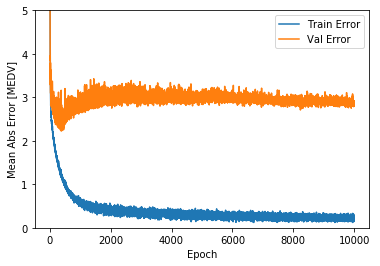

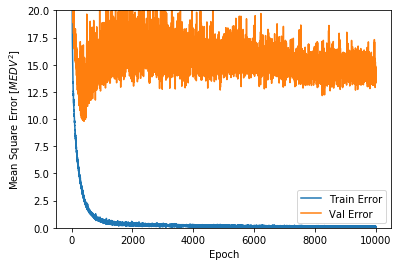

In [ ]:
plot_history(history)